<a href="https://colab.research.google.com/github/IkhlasJihad/AI-coursework/blob/main/Mall%20Users%20Categorization%20with%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - Packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 2 - Overview of the Problem set

**Problem Statement**: You are a machine learning engineer at a mall that wants to segment its users to some categories. The mall has given you an information about its users to cluster them, so the mall can direct its advertisments to the target users who will increase mall's profit.

Let's get more familiar with the dataset.

In [2]:
# Loading dataset
dataset = pd.read_csv('mall.csv')
dataset.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [3]:
dataset.size

600

In [4]:
df = pd.DataFrame(data= dataset, columns= dataset.columns)
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


### Now, you're going to cluster mall's users to help the mall to find the target segment of users who will increase the mall's profit.
    
### Let's go :)

### Find Optimal number of Clusters

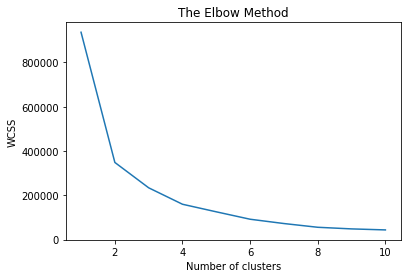

In [5]:
from sklearn.cluster import KMeans
wcss = []
clusters_range = range(1, 11)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(clusters_range, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**From the Elbow method graph, the optimal number of clusters = 3**

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=53)

In [10]:
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

### Visulaize the clusters

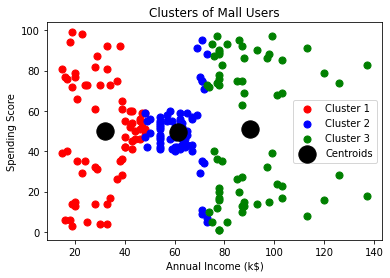

In [12]:
plt.scatter(df.iloc[y_kmeans==0, -2], df.iloc[y_kmeans==0, -1], 
            s=50, c='red', label='Cluster 1')
plt.scatter(df.iloc[y_kmeans==1, -2], df.iloc[y_kmeans==1, -1],
            s=50, c='blue', label='Cluster 2')
plt.scatter(df.iloc[y_kmeans==2, -2], df.iloc[y_kmeans==2, -1],
            s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, -2], kmeans.cluster_centers_[:, -1],
            s=300, c='black', label='Centroids')
plt.title('Clusters of Mall Users')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### Analysis

* Red Cluster: groups people with low salary but spending differently.
* BLue Cluster: groups people who actually have pretty good salaries and spend moneyalmost in moderate way.
* Green Cluster: groups people with barely high slaaries and have mostly either high or low spending scores.